In [15]:
import json
import re

In [169]:
autos = json.load(open("autos.json", "r"))

In [38]:
pri = re.compile(r"""[.]* Q.(\d*,\d*.\d{2})""")
num = re.compile(r"""(\d+)""")

In [50]:
pricel = map(lambda x: int("".join(num.findall(pri.findall(x["price_string"])[0])[:2:])), autos)

In [55]:
yearl = map(lambda x: int(x["year"]), autos)

In [48]:
len(autos)

789

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

In [60]:
import seaborn as sns
sns.set()

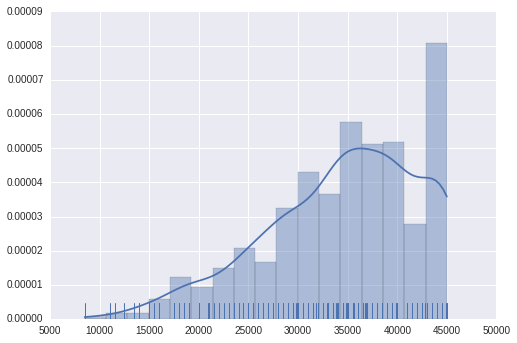

In [61]:
sns.distplot(pricel, rug=True)

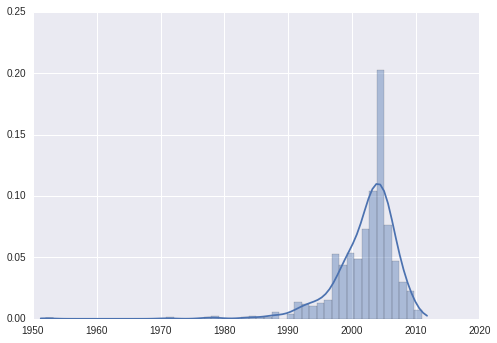

In [63]:
sns.distplot(yearl)

In [65]:
dataframed_price_year = pd.DataFrame(zip(pricel, yearl), columns=["price", "year"])

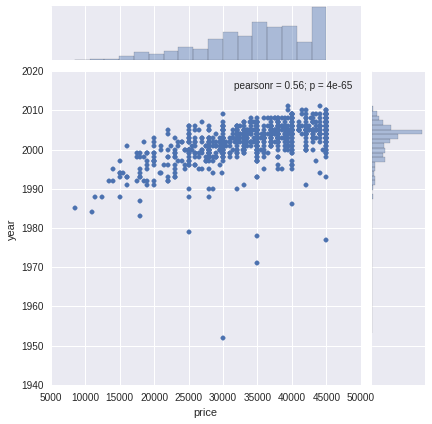

In [70]:
sns.jointplot(x="price", y="year", data=dataframed_price_year)

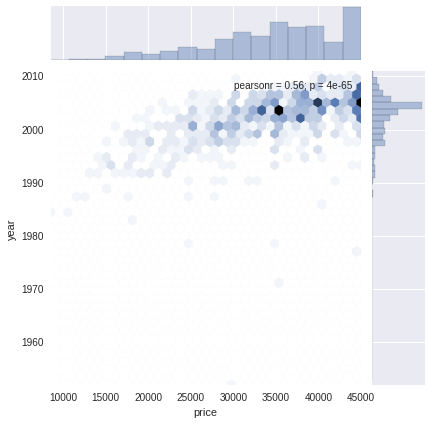

In [73]:
sns.jointplot(x="price", y="year", kind="hex", data=dataframed_price_year)

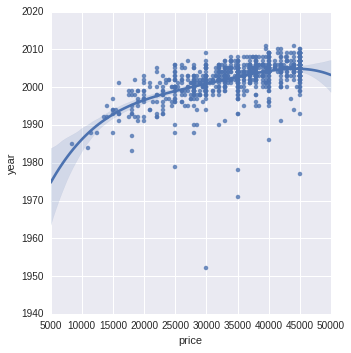

In [76]:
sns.lmplot(x="price", y="year", data=dataframed_price_year, order=4)

In [171]:
def clean_fix_autos(auto_item):
    pri = re.compile(r"""[.]* Q.(\d*,\d*.\d{2})""")
    num = re.compile(r"""(\d+)""")
    price = int("".join(num.findall(pri.findall(auto_item["price_string"])[0])[:2:]))
    del(auto_item["price_string"])
    auto_item["price"] = price
    auto_item["year"] = int(auto_item["year"])
    ccs = auto_item.get("ccs")
    if ccs is not None:
        # print(ccs)
        cc = num.findall(ccs)[0]
        auto_item["cc"] = int(cc)
    del(auto_item["ccs"])
    try:
        distance_s, units = auto_item["kms"].split()
        distance = int(distance_s)
        if units == "MILLAS":
            distance = distance * 1.6
        elif units == "KM":
            distance = distance
        auto_item["odo"] = distance
    except Exception as e:
        pass
    return auto_item    

In [172]:
pd_autos = pd.DataFrame(map(clean_fix_autos, autos))

In [176]:
pd_autos["model"].value_counts()

CIVIC                 53
LANCER                47
PROTEGE               38
3                     36
JETTA                 34
ACCENT                26
COROLLA               23
POLO                  22
6                     21
ECHO                  21
AVEO                  20
SENTRA                18
OPTRA                 17
206                   13
RIO                   13
325 I                 12
CIVIC EX              10
YARIS                  9
CIVIC LX               9
LANCER OZ RALLY        9
A4                     9
FOCUS                  8
CELICA                 8
MIRAGE                 7
GOLF                   7
S-40                   7
PASSAT                 7
ELANTRA                7
GOL                    6
ACCORD                 6
                      ..
RSX                    1
260-E                  1
DEMIO                  1
CRESSIDA               1
VERONA                 1
C-220                  1
VIGOR                  1
328 CI                 1
GTI                    1


In [179]:
pd_autos

,brand,cc,color,contact_string,gp_id,kms,model,odo,price,year
0,TOYOTA,2400,BLANCO,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 38990</h1>,54000 MILLAS,SCION,86400.0,40000,2007
1,NISSAN,NaN,GRIS,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 53089</h1>,None,SENTRA,NaN,38000,2006
2,MITSUBISHI,2000,CORINTO,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 51322</h1>,None,LANCER,NaN,38000,2006
3,CHEVROLET,1600,VERDE,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 54150</h1>,102000 KM,OPTRA,102000.0,32500,2006
4,CHEVROLET,1600,BEIGE,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 52527</h1>,115396 KM,OPTRA,115396.0,33000,2006
5,SUZUKI,2000,CORINTO,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 48611</h1>,118071 MILLAS,FORENZA,188913.6,32000,2006
6,MAZDA,2300,NEGRO,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 47410</h1>,129000 MILLAS,3,206400.0,45000,2006
7,HYUNDAI,1500,GRIS,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 54149</h1>,132500 MILLAS,ACCENT,212000.0,28000,2005
8,TOYOTA,1800,NEGRO,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 50230</h1>,None,COROLLA,NaN,45000,2006
9,KIA,2000,BEIGE,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 49967</h1>,63000,MAGENTIS,NaN,39900,2005


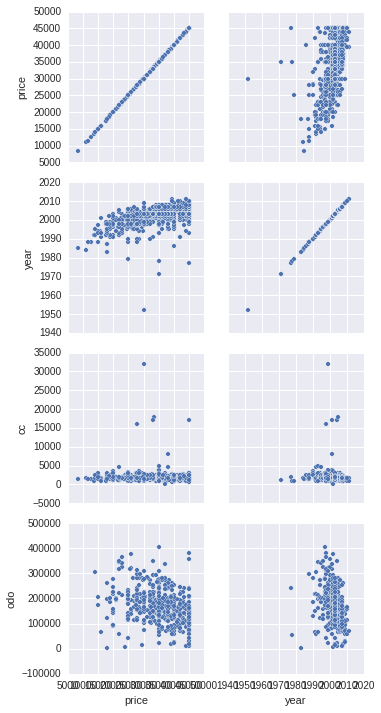

In [210]:
sns.pairplot(pd_autos, x_vars=["price", "year"], y_vars=["price", "year", "cc", "odo"], dropna=True);

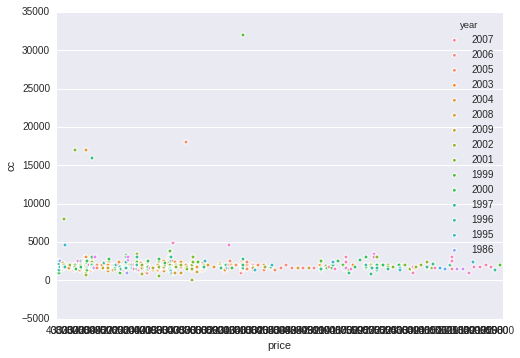

In [209]:
sns.stripplot(x="price", y="cc", hue="year", data=pd_autos, size=4)

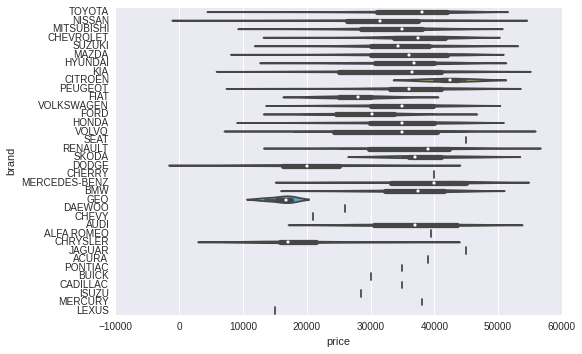

In [214]:
sns.violinplot(x="price", y="brand", data=pd_autos);

In [215]:
pd_autos

,brand,cc,color,contact_string,gp_id,kms,model,odo,price,year
0,TOYOTA,2400,BLANCO,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 38990</h1>,54000 MILLAS,SCION,86400.0,40000,2007
1,NISSAN,NaN,GRIS,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 53089</h1>,None,SENTRA,NaN,38000,2006
2,MITSUBISHI,2000,CORINTO,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 51322</h1>,None,LANCER,NaN,38000,2006
3,CHEVROLET,1600,VERDE,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 54150</h1>,102000 KM,OPTRA,102000.0,32500,2006
4,CHEVROLET,1600,BEIGE,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 52527</h1>,115396 KM,OPTRA,115396.0,33000,2006
5,SUZUKI,2000,CORINTO,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 48611</h1>,118071 MILLAS,FORENZA,188913.6,32000,2006
6,MAZDA,2300,NEGRO,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 47410</h1>,129000 MILLAS,3,206400.0,45000,2006
7,HYUNDAI,1500,GRIS,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 54149</h1>,132500 MILLAS,ACCENT,212000.0,28000,2005
8,TOYOTA,1800,NEGRO,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 50230</h1>,None,COROLLA,NaN,45000,2006
9,KIA,2000,BEIGE,"<div id=""carroContacto"">\n <h1>Contacto...",<h1>Detalle del vehículo 49967</h1>,63000,MAGENTIS,NaN,39900,2005


In [217]:
brand = pd_autos["brand"]

In [237]:
brand.value_counts()[:20:]

MAZDA            110
TOYOTA            95
HONDA             92
VOLKSWAGEN        90
MITSUBISHI        75
CHEVROLET         56
HYUNDAI           46
NISSAN            35
BMW               34
KIA               22
PEUGEOT           21
VOLVO             16
FORD              16
SUZUKI            14
MERCEDES-BENZ     11
AUDI              10
FIAT               9
RENAULT            6
GEO                4
CHRYSLER           4
dtype: int64

In [229]:
filtered_pd_autos = pd_autos.copy()

In [238]:
filtered_pd_autos.filter(brand, brand.value_counts()[:20:])

""
0
1
2
3
4
5
6
7
8
9
